#Sean Lahman's Baseball Dataset

##This dataset contains pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2015. I study four tables: Salary, HallOfFame, Batting
### questions amed to answer:

- how is the number of baseball players and teams change over the time
- how is the salary of baseball player change over the time
- which metric of batting data affect players salary
- what is the salary difference between palyers who was inducted to HallofFame or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint
%matplotlib inline

/home/yanyan/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df_s = pd.read_csv("Salaries.csv")
#df_s.describe()
df_s.head(4)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333


In [3]:
print df_s.shape
print df_s.columns

(24758, 5)
Index([u'yearID', u'teamID', u'lgID', u'playerID', u'salary'], dtype='object')


## investigate how the count of unique player and teams are chaning over the years

In [4]:
by_year_team_count  = df_s.groupby(['yearID','teamID']).size().groupby(level=0).count()

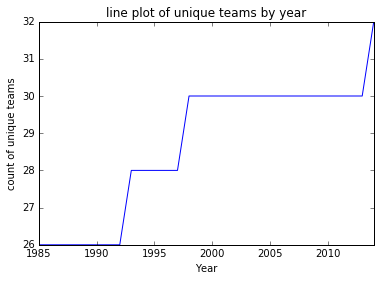

In [5]:
by_year_team_count.plot()
plt.xlabel('Year')
plt.ylabel('count of unique teams')
plt.title('line plot of unique teams by year')
plt.show()

In [6]:
by_year_player_count  = df_s.groupby(['yearID','playerID']).size().groupby(level=0).count()

In [7]:
type(by_year_player_count)

pandas.core.series.Series

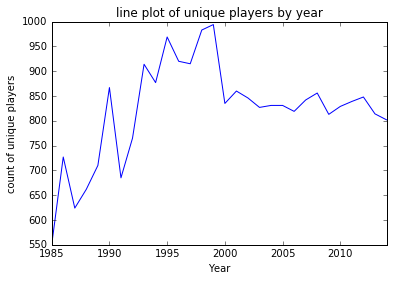

In [8]:
by_year_player_count.plot()
plt.xlabel('Year')
plt.ylabel('count of unique players')
plt.title('line plot of unique players by year')
plt.show()

### summary: the team count is increasing after year 2000, while the unique player count is decreasing, so the team is becoming smaller over the years

In [9]:
by_year_median_salary=df_s.groupby(['yearID',
                                    'playerID']).sum().groupby(level=0).median()

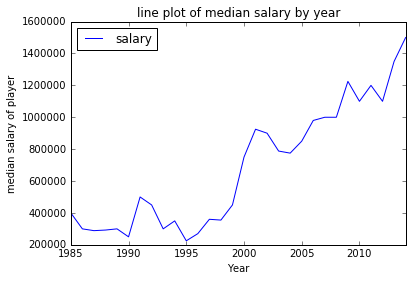

In [10]:
by_year_median_salary.plot()
plt.xlabel('Year')
plt.ylabel('median salary of player')
plt.title('line plot of median salary by year')
plt.show()

##salary distribution of the players

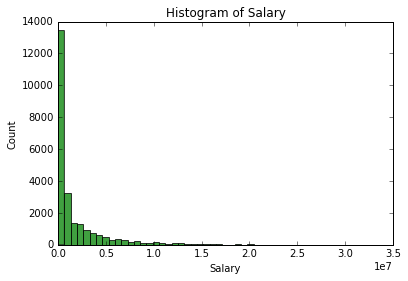

In [11]:
# the histogram of salary
plt.hist(df_s.salary, 50, facecolor='g', alpha=0.75)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Histogram of Salary')
plt.show()

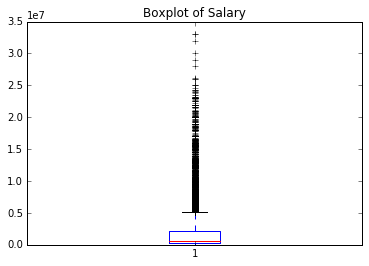

In [12]:
plt.boxplot(df_s.salary)
plt.title('Boxplot of Salary')
plt.show()

### clean the data for salary plot, get rid of extreme data

In [13]:
qtl5,qtl50,qtl95=df_s.salary.quantile([.05, .5, .95])
print qtl5
print qtl50
print qtl95

109000.0
525000.0
8500000.0


In [14]:
salary_small = df_s[(df_s.salary > qtl5) & (df_s.salary<qtl95)].salary

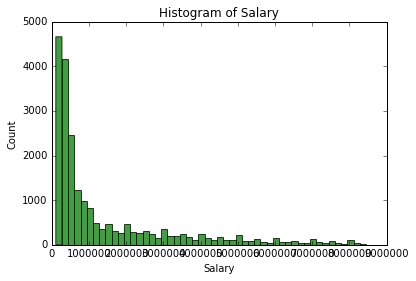

In [15]:
# the histogram of salary which only include the 90% of the data
plt.hist(salary_small, 50, facecolor='g', alpha=0.75)
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Histogram of Salary')
plt.show()

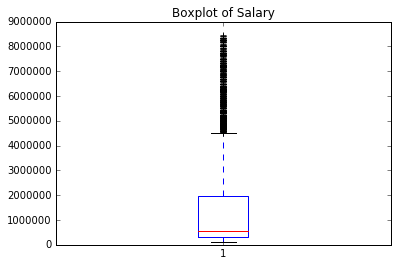

In [16]:
plt.boxplot(salary_small)
plt.title('Boxplot of Salary')
plt.show()

### summary: although we only use 90% the data, we still see that the data is very skewed. Small amount of players earn very very high salary. 

### batting data

In [17]:
df_b = pd.read_csv("Batting.csv")
df_b.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [33]:
df_b.dtypes
df_b.columns

Index([u'playerID', u'yearID', u'stint', u'teamID', u'lgID', u'G', u'AB', u'R',
       u'H', u'2B', u'3B', u'HR', u'RBI', u'SB', u'CS', u'BB', u'SO', u'IBB',
       u'HBP', u'SH', u'SF', u'GIDP'],
      dtype='object')

In [19]:
df_s_b=df_s.set_index('playerID').join(df_b.set_index('playerID'),how = "inner",lsuffix='_left', rsuffix='_right')

In [20]:
df_s_b.columns

Index([u'yearID_left', u'teamID_left', u'lgID_left', u'salary',
       u'yearID_right', u'stint', u'teamID_right', u'lgID_right', u'G', u'AB',
       u'R', u'H', u'2B', u'3B', u'HR', u'RBI', u'SB', u'CS', u'BB', u'SO',
       u'IBB', u'HBP', u'SH', u'SF', u'GIDP'],
      dtype='object')

In [21]:
df_s_b.dtypes
batting_indicator = df_s_b.columns[-17:]
batting_indicator_list = list(batting_indicator)
batting_indicator_list.append('salary')

In [22]:
df_s_b_salary_indicators = df_s_b.groupby(['playerID'])[batting_indicator_list].sum()

In [23]:
df_s_b_salary_indicators.columns

Index([u'G', u'AB', u'R', u'H', u'2B', u'3B', u'HR', u'RBI', u'SB', u'CS',
       u'BB', u'SO', u'IBB', u'HBP', u'SH', u'SF', u'GIDP', u'salary'],
      dtype='object')

In [24]:
cor_result=[df_s_b_salary_indicators['salary'].corr(df_s_b_salary_indicators[ind]) 
 for ind in batting_indicator]

G Games: number of games in which a player played
AB At Bats
R Runs
H Hits: times reached base because of a batted, fair ball without error by the defense
X2B Doubles: hits on which the batter reached second base safely
X3B  Triples: hits on which the batter reached third base safely
HR   Homeruns
RBI  Runs Batted In
SB   Stolen Bases
CS   Caught Stealing
BB  Base on Balls
SO  Strikeouts
IBB  Intentional walks
HBP  Hit by pitch
SH  Sacrifice hits
SF  Sacrifice flies
GIDP  Grounded into double plays

Details 

Variables X2B and X3B are named 2B and 3B in the original database


In [25]:
corr_result  = {}
for i in range (len(batting_indicator)):
    corr_result[batting_indicator[i]] = cor_result[i]
corr_result= sorted(corr_result.items(), key=lambda x:x[1], reverse=True)
pprint.pprint(corr_result)

[('G', 0.71297487513632707),
 ('HR', 0.6923244655066596),
 ('RBI', 0.6866545341167094),
 ('SO', 0.67880155402978715),
 ('R', 0.67360974921215022),
 ('2B', 0.6606881788824811),
 ('H', 0.6529676297132081),
 ('BB', 0.65231709137366367),
 ('AB', 0.65004906640435345),
 ('GIDP', 0.63362651923896895),
 ('SF', 0.62941460505024727),
 ('HBP', 0.59904750942910856),
 ('IBB', 0.57643784163497325),
 ('3B', 0.47320815535951027),
 ('CS', 0.44815986495312787),
 ('SB', 0.41804072182108326),
 ('SH', 0.41639352882959041)]


### summary: I am not good at the technial terms of the baseball games. From the correlation data, I can see that how many games the players play are highly correlated with the salary they earn. 

### join HallOfFame and Salary to salary between two player groups

In [26]:
df_hf = pd.read_csv("HallOfFame.csv")

In [27]:
df_s_hf=df_s.set_index('playerID').join(df_hf.set_index('playerID'),how = "inner")

In [28]:
df_s_hf.shape
df_s_hf.inducted
df_s_hf['inducted'] = df_s_hf['inducted'].astype('str')

##divide the players in two groups (inducted to hall of fame or not)  and study if there is salary difference between these two groups.

In [29]:
df_s_hf.groupby('inducted').count()

,yearID,teamID,lgID,salary,yearid,votedBy,ballots,needed,votes,category,needed_note
inducted,,,,,,,,,,,
N,6253,6253,6253,6253,6253,6253,6253,6253,6253,6253,0
Y,411,411,411,411,411,411,411,411,411,411,0


In [30]:
df_s_hf.groupby('inducted')['salary'].mean()

inducted
N    2.789202e+06
Y    3.696362e+06
Name: salary, dtype: float64

In [31]:
df_s_hf_true = df_s_hf[df_s_hf.inducted == "Y" ]['salary'].values
df_s_hf_false = df_s_hf[df_s_hf.inducted == "N" ]['salary'].values

#### statistical test of salary difference between two groups of players
####This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.  
### Ho: there is no salary difference between two groups of players
### Ha : there is difference between two groups of players

In [32]:
import scipy.stats as stats
t_stat, p_val = stats.ttest_ind(df_s_hf_true, df_s_hf_false, equal_var=True)
print t_stat
print p_val

5.59076136932
2.35034015176e-08


###summary: The two-tailed p-value is less than 0.05, we can see there is statistical significance of salary between players who has been inducted or not.

##Project Summary

- The number of unique baseball players has been increasing from 1985 to around 2000. But after 2000, it seems to be stailibized with small fluctuations. 
- the number of unique baseball team has been increasing gradually since 1985, but it has not been change for around more than 10 years from around 2000 to 2010. 
- The meidum salary of baseball player has been on the trend of increasing with small flucutations. 
- The baseball players salary are highly correlated with how many games he/she played, and how many homerun he/she has. But correlation does not mean causation, it does not mean more games played can lead to high salary. There are a lot of other factors that are correlated with players salary.  Another conclusion I found is: there is significant salary difference between players who have been indcuted to the hall of fame, and how have not.

- why I am interseted in this dataset: The baseball are a huge data set,  I am intereted in using this dataset is because there are so many tables, and the datasets provides me with opportunity of maninuplating the data by joining.  

- Limitations: the angles that I used in this project is very limited: I only studies three tables. And even for the detailed the batting techniques I did not go throught. If I am very enthusiastic about baseball techniques(however, currently I am not), I should dig more about those techinqius and see how those techniqes affect salary and do rigigous t statisitcal test to compare people from different groups, different years. Another question on the techniques part could ask is: how has the top techiques of baseball affecting basebasll players' salary been evovling over the years. 

